# Numpy and Matplotlib

## Numpy numerical library

NumPy is a linear algebra library in Python, with computationally expensive methods written in FORTRAN for speed. 

* The reference manual is at <https://numpy.org/doc/stable/>. 
* A nice tutorial can be found at <https://numpy.org/doc/stable/user/quickstart.html>
* or: <https://cs231n.github.io/python-numpy-tutorial/>
* If you already know Matlab, a comparison is at <https://numpy.org/doc/stable/user/numpy-for-matlab-users.html>

### Importing libraries

To import a library in Python, you only need to use the keyword `import` at the beginning of your script / notebook (or more exactly, before you use it).

```python
import numpy
```

Think of it as the equivalent of `#include <numpy.h>` in C/C++ (if you know Java, you will not be shocked). You can then use the functions and objects provided by the library using the namespace of the library:

```python
x = numpy.array([1, 2, 3])
```

If you do not want to type `numpy.` everytime, and if you are not afraid that numpy redefines any important function, you can also simply import every definition declared by the library in your current namespace with:

```python
from numpy import *
```

and use the objects directly:

```python
x = array([1, 2, 3])
```

However, it is good practice to give an alias to the library when its name is too long (numpy is still okay, but think of matplotlib...):

```python
import numpy as np 
```

You can then use the objects like this:

```python
x = np.array([1, 2, 3])
```

Remember that you can get help on any NumPy function:

```python
help(np.array)
help(np.ndarray.transpose)
```

In [1]:
import numpy as np

### Vectors and matrices

The basic object in NumPy is an **array** with d-dimensions (1D = vector, 2D = matrix, 3D or more = tensor). They can store either integers or floats, using various precisions.

In order to create a vector of three floats, you simply have to build an `array()` object by providing a list of floats as input:

```python
A = np.array( [ 1., 2., 3.] )
```

Matrices should be initialized with a list of lists.  For a 3x4 matrix of 8 bits unsigned integers, it is:

```python
B = np.array( [ 
    [ 1, 2, 3, 4],
    [ 5, 6, 7, 8],
    [ 4, 3, 2, 1] 
  ] , dtype=np.uint8)
```

Most of the time, you won't care about the type (the default floating-point precision is what you want for machine learning), but if you need it, you can always specify it with the parameter `dtype={int32, uint16, float64, ...}`. Note that even if you pass integers to the array (`np.array( [ 1, 2, 3] )`), they will be converted to floats by default.

The following attributes of an array can be accessed:

- `A.shape` : returns the shape of the vector `(n,)` or matrix `(m, n)`.

- `A.size` : returns the total number of elements in the array.

- `A.ndim` : returns the number of dimensions of the array (vector: 1, matrix:2).

- `A.dtype.name` : returns the type of data stored in the array (int32, uint16, float64...).

**Q:** Define the two arrays $A$ and $B$ from above and print those attributes. Modify the arrays (number of elements, type) and observe how they change. 

*Hint:* you can print an array just like any other Python object.

In [2]:
A = np.array( [ 1., 2., 3.] )

print(A)
print('Shape of A is :', A.shape)
print('Size of A is :', A.size)
print('Number of dimensions of A is :', A.ndim)
print('Type of elements in A is :', A.dtype.name)

B = np.array( [ 
    [ 1, 2, 3, 4],
    [ 5, 6, 7, 8],
    [ 4, 3, 2, 1] 
] , dtype=np.uint8)

print(B)
print('Shape of B is :', B.shape)
print('Size of B is :', B.size)
print('Number of dimensions of B is :', B.ndim)
print('Type of elements in B is :', B.dtype.name)

[1. 2. 3.]
Shape of A is : (3,)
Size of A is : 3
Number of dimensions of A is : 1
Type of elements in A is : float64
[[1 2 3 4]
 [5 6 7 8]
 [4 3 2 1]]
Shape of B is : (3, 4)
Size of B is : 12
Number of dimensions of B is : 2
Type of elements in B is : uint8


Internally, the values are stored sequentially as a vector, even if your array has more than one dimension. The apparent shape is just used for mathematical operations. You can **reshape** a matrix very easily with the `reshape()` method:

```python
B = np.array( [ 
    [ 1, 2, 3, 4],
    [ 5, 6, 7, 8],
    [ 4, 3, 2, 1] 
]) # B has 3 rows, 4 columns

C = B.reshape((6, 2)) # C has 6 rows, 2 columns
```

The only thing to respect is that the total number of elements must be the same. Beware also of the order in which the elements will be put.

**Q:** Create a vector with 8 elements and reshape it into a 2x4 matrix.

In [3]:
B = np.array( [1, 2, 3, 4, 5, 6, 7, 8])

C = B.reshape((2, 4))
print(C)

[[1 2 3 4]
 [5 6 7 8]]


### Initialization of an array

Providing a list of values to `array()` would be tedious for large arrays. Numpy offers constructors that allow to construct simply most vectors or matrices.

`np.zeros(shape)` creates an array of shape `shape` filled with zeros. Note: if you give a single integer for the shape, it will be interpreted as a vector of shape `(d,)`. 

`np.ones(shape)` creates an array of shape `shape` filled with ones. 

`np.full(shape, val)` creates an array of shape `shape` filled with `val`. 

`np.eye(n)` creates a diagonal matrix of shape `(n, n)`.

`np.arange(a, b)` creates a vector of integers whose value linearly increase from `a` to `b` (excluded).

`np.linspace(a, b, n)` creates a vector of `n` values evenly distributed between `a` and `b` (included).


**Q:** Create and print:

* a 2x3 matrix filled with zeros.
* a vector of 12 elements initialized to 3.14.
* a vector of 11 elements whose value linearly increases from 0.0 to 10.0.
* a vector of 11 elements whose value linearly increases from 10 to 20.

In [4]:
A = np.zeros((2,3))  
B = np.full(12, 3.14)  # 3.14 * np.ones(12) would also work
C = np.linspace(0.0, 10.0, 11) 
D = np.arange(10, 21)

### Random distributions

In many cases, it is useful to initialize a vector or matrix with random values. **Random number generators** (rng) allows to draw numbers from any probability distribution (uniform, normal, etc.) using pseudo-random methods. 

In numpy versions before 1.16, the `numpy.random` module had direct methods allowing to initialize arrays:

```python
A = np.random.uniform(-1.0, 1.0, (10, 10)) # a 10x10 matrix with values uniformly taken between -1 and 1
```

Since numpy 1.16, this method has been deprecated in favor of a more explicit initialization of the underlying rng:

```python
rng = np.random.default_rng()
A = rng.uniform(-1.0, 1.0, (10, 10))
```

The advantages of this new method (reproducibility, parallel seeds) will not matter for these exercises, but let's take good habits already.

The generator has many built-in methods, covering virtually any useful probability distribution. Read the documentation of the random generator:

<https://numpy.org/doc/stable/reference/random/generator.html>

**Q:** Create:

* A vector of 20 elements following a normal distribution with mean 2.0 and standard devation 3.0.
* A 10x10 matrix whose elements come from the exponential distribution with $\beta = 2$.
* A vector of 10 integers randomly chosen between 1 and 100 (hint: involves `arange` and `rng.choice`).

In [5]:
rng = np.random.default_rng()
A = rng.normal(2.0, 3.0, 20)
B = rng.exponential(2.0, (10, 10))
C = rng.choice(np.arange(1, 101), 10)

### Manipulation of matrices: indices, slices

To access a particular element of a matrix, you can use the usual Python list style (the first element has a rank of 0), once per dimension:

```python
A = np.array(
    [ 
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]
    ]
)

x = A[0, 2] # The element on the first row and third column
```

For matrices, the first index represents the rows, the second the columns. [0, 2] represents the element at the first row, third column.

**Q:** Define this matrix and replace the element `12` by a zero using indices:

In [6]:
A = np.array(
    [ 
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]
    ]
)

A[2, 3] = 0.
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11  0]]


It is possible to access complete row or columns of a matrix using **slices**. The `:` symbol is a shortcut for "everything":

```python
b = A[:, 2] # third column
c = A[0, :] # first row
```

**Q:** Set the fourth column of A to 1.

In [7]:
A[:, 3] = 1.

print(A)

[[ 1  2  3  1]
 [ 5  6  7  1]
 [ 9 10 11  1]]


As for python lists, you can specify a range `start:stop` to get only a subset of a row/column (beware, stop is excluded):

```python
d = A[0, 1:3] # second and third elements of the first row
e = A[1, :2] # first and second elements of the second row
```

You can use boolean arrays to retrieve indices:

```python
A = np.array( 
    [ [ -2,  2,  1, -4],
      [  3, -1, -5, -3] ])

negatives = A < 0 # Boolean array where each element is True when the condition is met.
A[negatives] = 0 # All negative elements of A (where the boolean matrix is True) will be set to 0
```

A simpler way to write it is:

```python
A[A < 0] = 0
```

**Q:** print A, negatives and A again after the assignment:

In [8]:
A = np.array( 
    [ [ -2,  2,  1, -4],
      [  3, -1, -5, -3] ])
negatives = A < 0
A[negatives] = 0

print(negatives)
print(A)

[[ True False False  True]
 [False  True  True  True]]
[[0 2 1 0]
 [3 0 0 0]]


### Basic linear algebra 

Let's first define some matrices:

In [9]:
A = np.array( [ [ 1, 2, 3, 4],
                [ 5, 6, 7, 8] ])

B = np.array( [ [ 1, 2],
                [ 3, 4],
                [ 5, 6],
                [ 7, 8] ])

C = np.array( [ [  1,  2,  3,  4],
                [  5,  6,  7,  8],
                [  9,  0,  1,  1],
                [ 13,  7,  2,  6] ])

#### Transpose a matrix 

A matrix can be transposed with the `transpose()` method or the `.T` shortcut:

```python
D = A.transpose() 
E = A.T # equivalent
```

**Q:** Try it:

In [10]:
D = A.transpose() 
E = A.T

print(A)
print(D)

[[1 2 3 4]
 [5 6 7 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]


`transpose()` does not change `A`, it only returns a transposed copy. To transpose `A` definitely, you have to use the assigment `A = A.T`

#### Multiply two matrices 

There are two manners to multiply matrices:

- element-wise: Two arrays of **exactly** the same shape can be multiplied *element-wise* by using the `*` operator:

```python
D = A * B
```

- algebrically: To perform a **matrix multiplication**, you have to use the `dot()` method. Beware: the dimensions must match! `(m, n) * (n, p) = (m, p)`

```python
E = np.dot(A,  B)
```

**Q:** Use the matrices `A` and `B` previously defined and multiply them element-wise and algebrically. You may have to transpose one of them.

In [11]:
D = A * B.T
E = A.T * B

print(D)
print(E)

F = np.dot(A, B)
G = np.dot(B, A)

print(F)
print(G)

[[ 1  6 15 28]
 [10 24 42 64]]
[[ 1 10]
 [ 6 24]
 [15 42]
 [28 64]]
[[ 50  60]
 [114 140]]
[[11 14 17 20]
 [23 30 37 44]
 [35 46 57 68]
 [47 62 77 92]]


#### Multiplying a matrix with a vector

`*` and `np.dot` also apply on matrix-vector multiplications $\mathbf{y} = A \times \mathbf{x}$ or vector-vector multiplications.

**Q:** Define a vector $\mathbf{x}$ with four elements and multiply it with the matrix $A$ using `*` and `np.dot`. What do you obtain? Try the same by multiplying the vector $\mathbf{x}$ and itself.

In [12]:
x = np.array([1, 2, 3, 4])

y = np.dot(A, x)
z = A*x

p = x*x
q = np.dot(x, x)

print(y)
print(z)
print(p)
print(q)

[30 70]
[[ 1  4  9 16]
 [ 5 12 21 32]]
[ 1  4  9 16]
30


**A:** the element-wise multiplies each column of the matrix by the corresponding element of the vector. `np.dot` works as expected. The same happens for vector-vector multiplications: element-wise for `*`, dot-product for `np.dot` (hence the name of the method).

#### Inverting a matrix

Inverting a Matrix (when possible) can be done using the `inv()` method whitch is defined in the `linalg` submodule of NumPy.

```python
inv_C = np.linalg.inv(C)
```

**Q:**

1. Invert `C` and print the result.
2. Multiply `C` with its inverse and print the result. What do observe? Why is Numpy called a *numerical computation* library?

In [13]:
inv_C = np.linalg.inv(C)

print(inv_C)
print(np.dot(C,inv_C))

[[-0.0467033   0.00274725  0.0989011   0.01098901]
 [-0.62362637  0.27197802 -0.20879121  0.08791209]
 [-0.61263736  0.4478022   0.12087912 -0.20879121]
 [ 1.03296703 -0.47252747 -0.01098901  0.10989011]]
[[ 1.00000000e+00 -2.22044605e-16 -5.55111512e-17  1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00 -2.22044605e-16 -2.22044605e-16]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00 -6.93889390e-17]
 [-2.22044605e-16 -2.22044605e-16 -2.22044605e-16  1.00000000e+00]]


**A:** Some elements which should be 0 have a very small value. This is due to numerical precision issues. Numpy does not make symbolic computations like Mathematica or sympy, it deals with numbers up to a certain precision.

### Summing elements 

One can sum the elements of a matrix globally, row-wise or column-wise:

```python
# Globally
S1 = np.sum(A)

# Per column
S2 = np.sum(A, axis=0) 

# Per row
S3 = np.sum(A, axis=1) 
```

**Q:** Try them:

In [14]:
# Globally
S1 = np.sum(A)

# Per column
S2 = np.sum(A, axis=0) 

# Per row
S3 = np.sum(A, axis=1) 

print(A)
print(S1)
print(S2)
print(S3)

[[1 2 3 4]
 [5 6 7 8]]
36
[ 6  8 10 12]
[10 26]


You also have access to the minimum (`np.min()`), maximum (`np.max()`), mean (`np.mean()`) of an array, also per row/column. 

**Q:** Try them out:

In [15]:
print(np.min(A))
print(np.max(A))
print(np.mean(A))

print(np.min(A, axis=0))
print(np.max(A, axis=0))
print(np.mean(A, axis=0))

print(np.min(A, axis=1))
print(np.max(A, axis=1))
print(np.mean(A, axis=1))

1
8
4.5
[1 2 3 4]
[5 6 7 8]
[3. 4. 5. 6.]
[1 5]
[4 8]
[2.5 6.5]


### Mathematical operations 

You can apply any usual mathematical operations (cos, sin, exp, etc...) on each element of a matrix (element-wise):

```python
D = np.exp(A)
E = np.cos(A)
F = np.log(A)
G = (A+3) * np.cos(A-2)
```

**Q:** Try it.

In [16]:
D = np.exp(A)
E = np.cos(A)
F = np.log(A)
G = (A+3) * np.cos(A-2)

print(D)
print(E)
print(F)
print(G)

[[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]]
[[ 0.54030231 -0.41614684 -0.9899925  -0.65364362]
 [ 0.28366219  0.96017029  0.75390225 -0.14550003]]
[[0.         0.69314718 1.09861229 1.38629436]
 [1.60943791 1.79175947 1.94591015 2.07944154]]
[[ 2.16120922  5.          3.24181384 -2.91302786]
 [-7.91993997 -5.88279259  2.83662185 10.56187315]]


## Matplotlib

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

* Reference: <http://matplotlib.org>
* Tutorial by N. Rougier: <http://www.labri.fr/perso/nrougier/teaching/matplotlib>

This is the default historical visualization library in Python, which anybody should know, but not the nicest. If you are interested in having better visualizations, have a look at:

* `seaborn` <https://seaborn.pydata.org/>
* `ggplot2` <https://ggplot2.tidyverse.org/>
* `bokeh` <https://docs.bokeh.org/>
* `plotly` <https://plotly.com/python/>

We will nevertheless stick to matplotlib in these exercises.

The `pyplot` module is the most famous, as it has a similar interface to Matlab. It is customary to use the `plt` namescape for it:

In [17]:
import matplotlib.pyplot as plt

### `plt.plot()`

The `plt.plot()` command allows to make simple line drawings:

```python
x = np.linspace(0., 10., 100)
y = x**2 + 1.

plt.figure()
plt.plot(x, y)
plt.show()
```

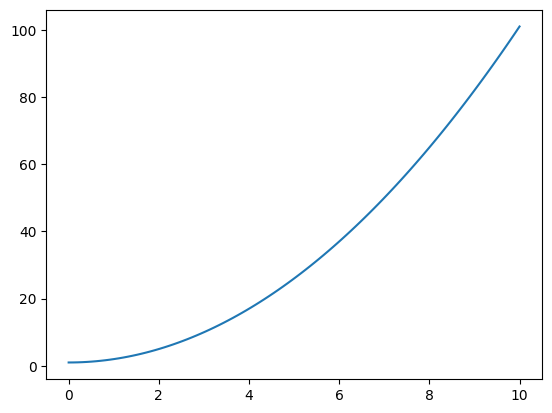

In [18]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.

plt.figure()
plt.plot(x, y)
plt.show()

`plot()` takes two vectors `x` and `y` as inputs (they must have the same size) and plots them against each other. It is standard to define the x-axis with `np.linspace()` if you just want to plot a function. 100 points is usually a good choice, but you can experiments with less points.

The call to `plt.show()` is obligatory at the end to display the window when using a script (very common mistake to forget it!). It is not needed in Jupyter notebooks as it is implicitly called, but let's take the habit anyway. 

The call to `plt.figure()` is also optional, as a new figure is created when you call `plt.plot()` for the first time.

**Q:** Create a third vector `z` (e.g. `z = -x**2 + 2`) and plot it against `x` right after `y` (i.e. between `plt.plot(x, y)` and `plt.show()`). What happens?

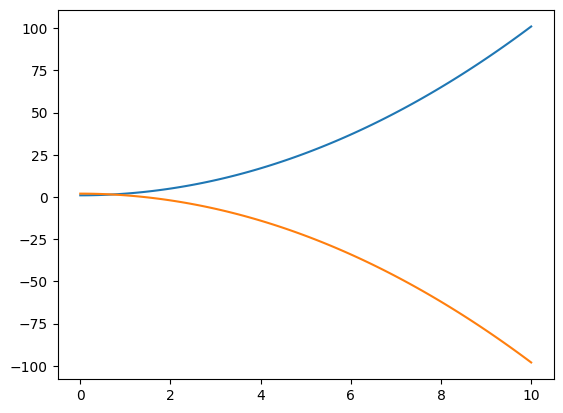

In [19]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure()
plt.plot(x, y)
plt.plot(x, z)
plt.show()

**Q:** Now call `plt.figure()` again between the two plots. What happens?

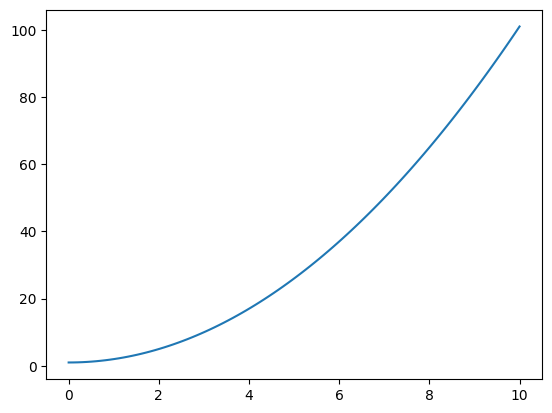

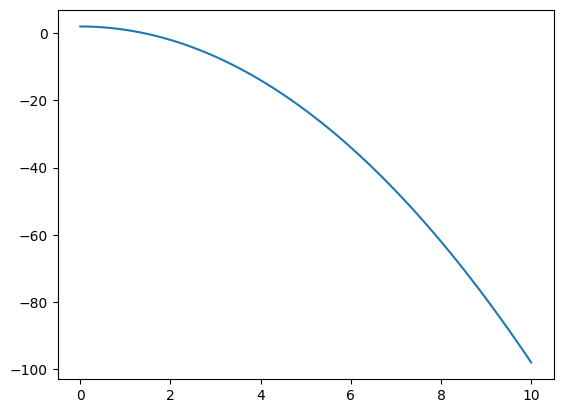

In [20]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure()
plt.plot(x, y)
plt.figure()
plt.plot(x, z)
plt.show()

By default, the plot is quite empty. This is fine when experimenting in a notebook, but not when incorporating the figures in your thesis. You can make a plot look better by adding a title, labels on the axes, etc. 

```python
plt.title('My title')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
```

**Q:** Make the previous plots nicer by adding legends and axes.

*Hint:* if you know LateX equations, you can insert simple formulas in the title or axes by using two dollar signs `$$`.

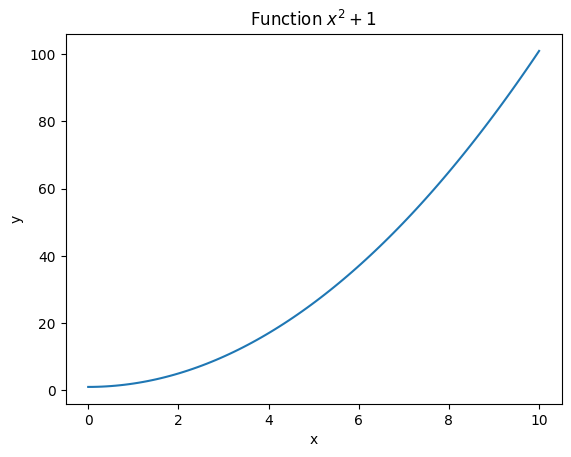

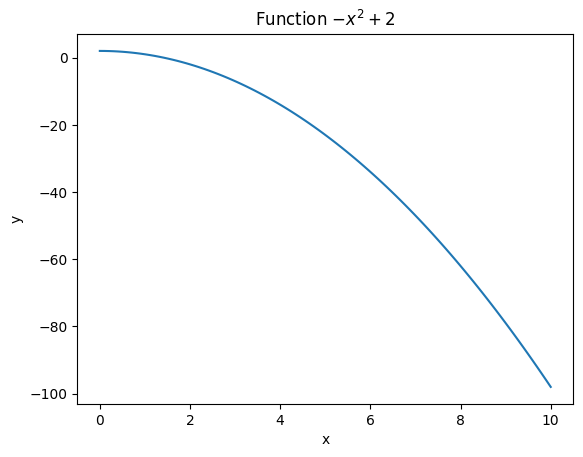

In [21]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure()
plt.plot(x, y)
plt.title("Function $x^2 + 1$")
plt.xlabel("x")
plt.ylabel("y")

plt.figure()
plt.plot(x, z)
plt.title("Function $-x^2 + 2$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

If you make multiple plots on the same figure by calling `plt.plot()` multiple times, you can add a label to each plot to create a legend with `plt.legend()`:

```python
plt.plot(x, y, label='y')
plt.plot(x, z, label='z')
plt.legend()
```

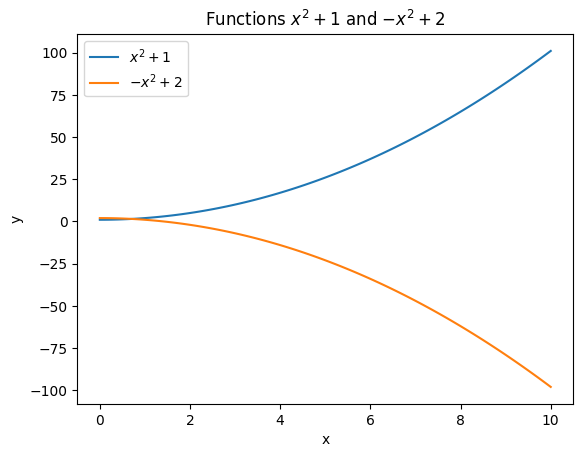

In [22]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure()
plt.plot(x, y, label="$x^2 + 1$")
plt.plot(x, z, label="$-x^2 + 2$")
plt.title("Functions $x^2 + 1$ and $-x^2 + 2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Another advantage of declaring a figure is that you can modify its size (which is very small in a notebook by default) with the `figsize` argument in inches:

```python
plt.figure(figsize=(16, 10))
```

**Q:** Experiment with figure sizes.

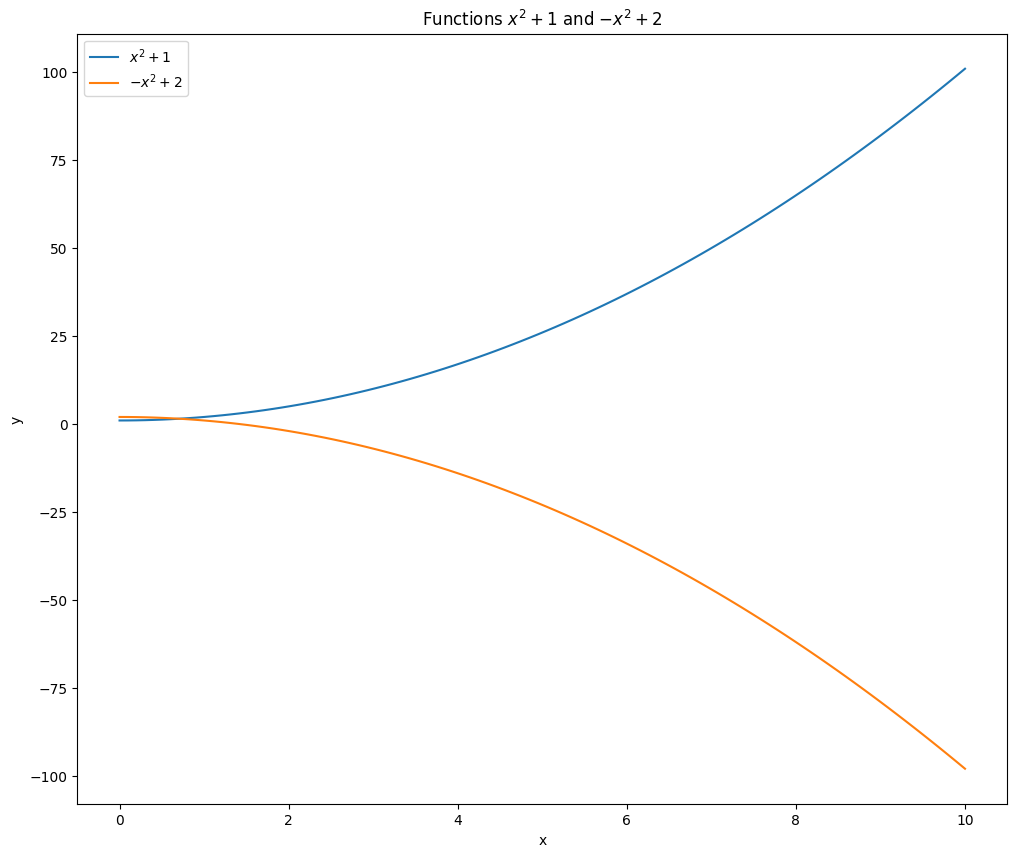

In [23]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure(figsize=(12, 10))
plt.plot(x, y, label="$x^2 + 1$")
plt.plot(x, z, label="$-x^2 + 2$")
plt.title("Functions $x^2 + 1$ and $-x^2 + 2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Side-by-side plots

To make separate plots in the same figure, you can use `plt.subplot(abc)`.

The function takes three digits a, b, c as input (e.g. 221 or 122) where:

- a is the number of rows.
- b is the number of columns.
- c is the index (starting at 1) of the current subplot.

Here is a dummy example of a 2x2 grid of plots:

```python
plt.subplot(221)
plt.plot(x, y)

plt.subplot(222)
plt.plot(x, z)

plt.subplot(223)
plt.plot(y, x)

plt.subplot(224)
plt.plot(z, x)
```

**Q:** Try it.

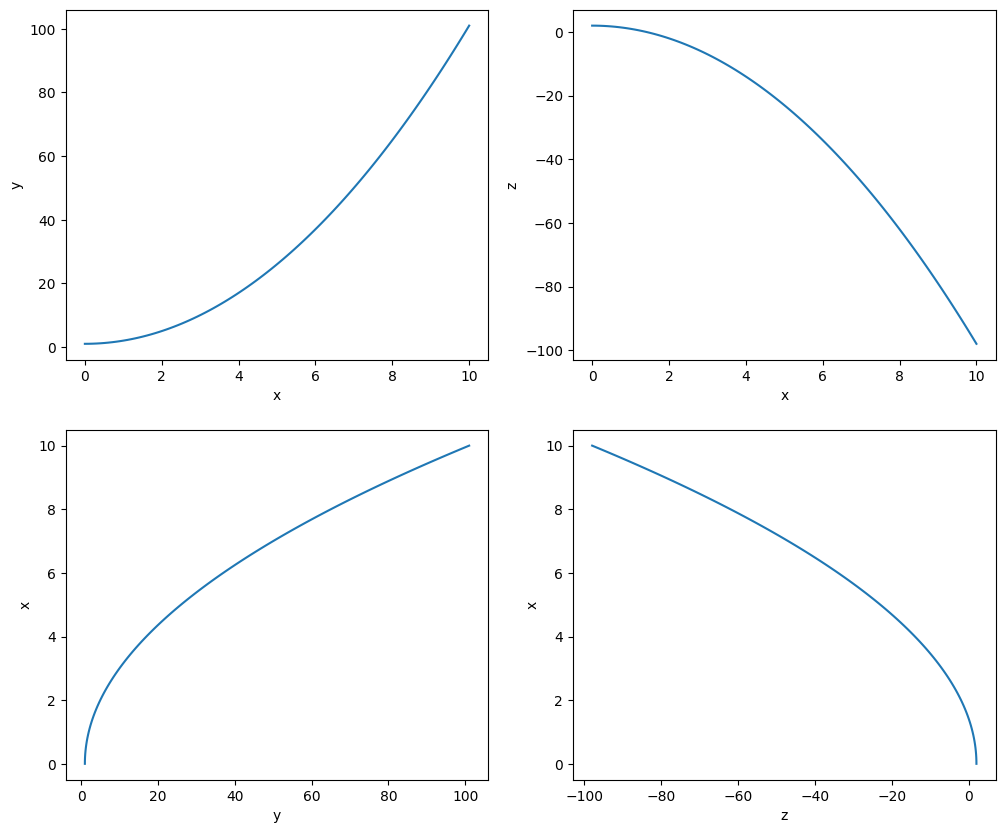

In [24]:
x = np.linspace(0., 10., 100)
y = x**2 + 1.
z = -x**2 + 2.

plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(222)
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(223)
plt.plot(y, x)
plt.xlabel('y')
plt.ylabel('x')

plt.subplot(224)
plt.plot(z, x)
plt.xlabel('z')
plt.ylabel('x')
plt.show()

### `plt.imshow`

Matrices can be displayed using `plt.imshow()`. You can choose the color code with the `cmap` argument (e.g. `gray` or `hot`).

```python
plt.imshow(A, cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar()
```

`plt.colorbar()` allows to show a vertical bar indicating the color code. 

The interpolation method can also be selected for small matrices (`'nearest` by default, but you can choose `interpolation="bicubic"` for a smoother display).

(0, 0) is at the top-left of the image, the first axis is vertical. Change it with the `origin` parameter.

**Q:** Create a 10x10 matrix (e.g. randomly) and plot it. Try different color maps (<https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html> and interpolation methods.

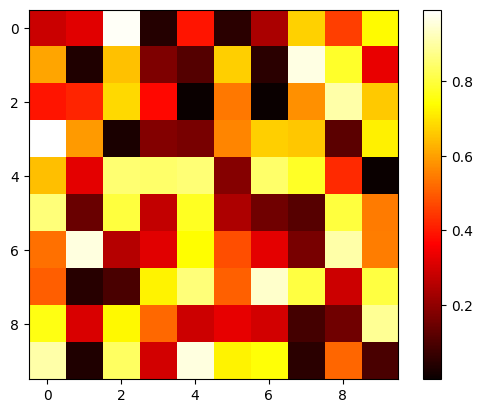

In [25]:
A = rng.uniform(0., 1., (10, 10))

plt.figure()
plt.imshow(A, cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar()
plt.show()

### `plt.scatter`

If you want to display dots instead of of lines or pixels, `plt.scatter` takes two vectors of same size and plots them against each other:

```python
plt.scatter(x, y)
```

**Q:** Create two vectors with 100 elements and make a scatter plot.

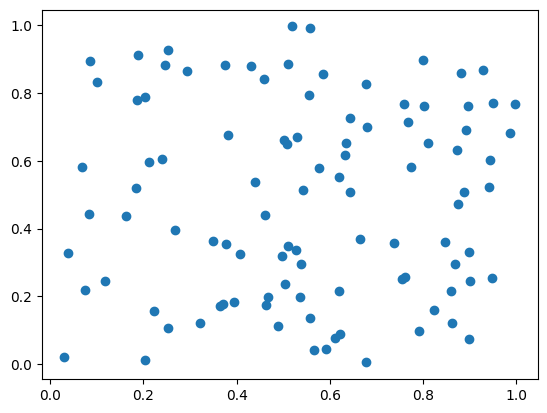

In [26]:
x = rng.uniform(0., 1., 100)
y = rng.uniform(0., 1., 100)

plt.figure()
plt.scatter(x, y)
plt.show()

### `plt.hist()`

Histograms can be useful to visualize the distribution of some data. If `z` is a vector of values, the histogram is simply:

```python
plt.hist(z, bins=20)
```

The number of bins is 10 by default, but you can of course change it.

**Q:** Draw 1000 values from a normal distribution of your choice and make an histogram.

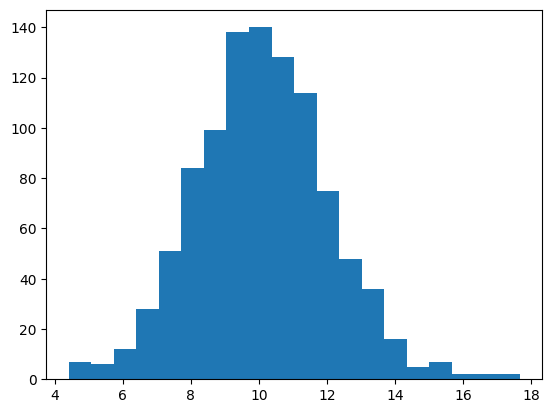

In [27]:
z = rng.normal(10., 2.0, 1000)

plt.figure()
plt.hist(z, bins=20)
plt.show()